# Apartmentguide Desktop
User Interaction Behavior based on page number and position

In [ ]:
import sqlalchemy as al
import pandas as pd
import pyodbc as db
import pandasql as psql
import matplotlib as plt
import numpy as np

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

sql = """select pp.t_visit,pid.rownum 
       ,pp.parseid,ProfileKey,YMDID,Eventdate,action,app_name,app_version,browser,browser_version,campaign_id,carrier 
       ,city,CustIPAddress,device,DerivedCampaignID,DerivedEFID,ef_id,featured_array,FirstEventTVisit,FirstEventVisit 
       ,LastEventTVisit,LastEventVisit,link_id,listing_array,listingId,listings_per_page,neighborhood,operating_system 
       ,operating_system_version,page,page_category,page_number,page_position=null,page_sub,path,position,profile 
       ,querystring,referrer,referring_domain,refinement_array,screen_title,screen_type,selection,seq,spotlight_array 
       ,ssSiteName,ssTestName,ssVariationGroupName,state,subprofile,tpl_source,unitlayout_id,url,uzid,visit,visitor,x,y,zip_code 
from  stagedb.dbo.parsedPivot pp 
join (select t_visit=substring(t_visit,1,30)  
             ,rownum= row_number() over (partition by t_visit order by eventdate)  
             ,parseid 
        from stagedb.dbo.[ParsedPivot] 
       where profilekey=1 
         and t_visit in (select distinct t_visit from stagedb.staging.parsedPivot where datepart(hh,eventdate) =11 ) 
      ) pid 
      on pp.parseid=pid.parseid 
order by pp.t_visit, pid.rownum
"""
cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
data = pd.read_sql(sql, cnn)
cnn.close()

for i in  data['listingId'][data['listingId'].notnull()].index:   
    try:
        data.loc[i,'page_position'] =  data.loc[data.query('t_visit == \''+data['t_visit'][i]+'\' & action == \'pageview\'  & rownum < '+str(data['rownum'][i]))['listing_array'].index[-1]]['listing_array'].split(",").index(data['listingId'][i])  
    except Exception as e: 
            pass

        
import matplotlib.pyplot as plt

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

plt.figure()
b=pysqldf("""select 
page_number
,page_position+1 as page_position, count() as area
from data
where page_position is not null
group by page_number,page_position;""")

x = b['page_number']
y = b['page_position']
z = b['area']

plt.scatter(x, y, s=z, c='yellow', alpha=1)
plt.show()       

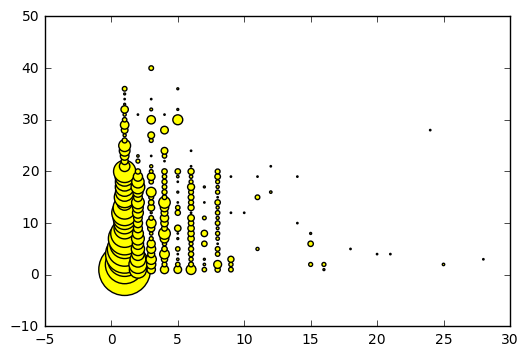

In [3]:
# ApartmentGuide Mobile
from IPython.display import Image
Image(filename='./Hour11PositionPageNumber.png', width=800) 

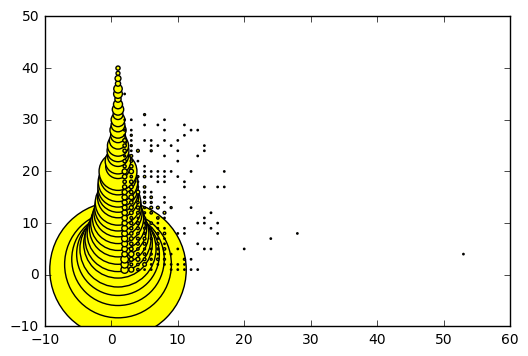

In [35]:
Image(filename='./AGOneDay.png', width=800) 

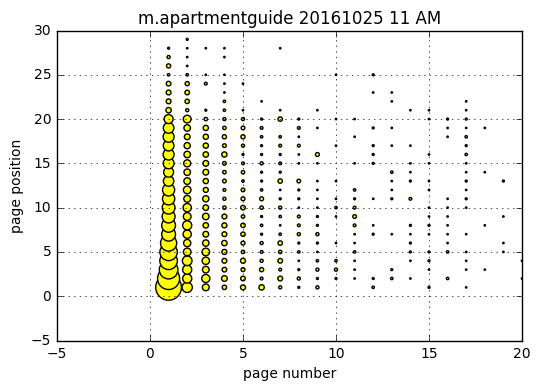

In [4]:
# M.AG  1 hour and 1 day Graph
Image(filename='./MDotAGOneHour.png', width=800) 

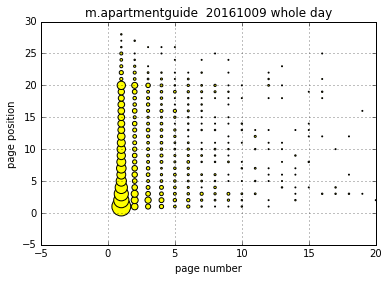

In [36]:
Image(filename='./MDotAGOneDay.png', width=800) 


# WWW.Apartmentguide.com User Behavior Bounce Analysis


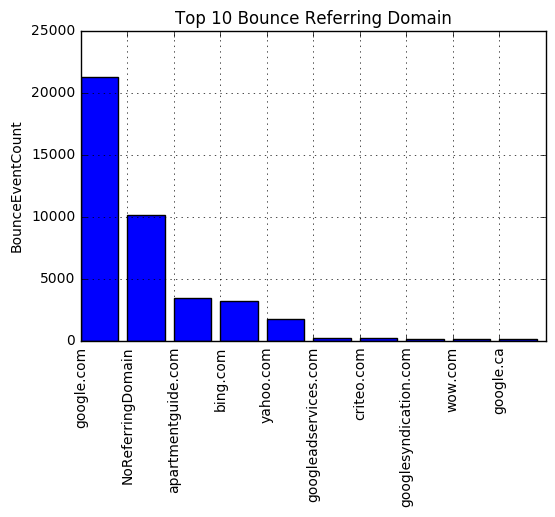

In [1]:
import numpy as np
import pandas as pd
import pyodbc as db
#import pandasql as psql
import matplotlib.pyplot as plt

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

sql= """
select 
       refer_domain=
		reverse(
		substring(reverse(isnull(referring_domain,'NoReferringDomain')),1,
		case when charindex('.',reverse(isnull(referring_domain,'NoReferringDomain')),5) >0 then charindex('.',reverse(isnull(referring_domain,'NoReferringDomain')),5)-1
		else 100 end
		)), BounceEventCnt=count(1)
from datascience.dbo.parsedPivot
where ymdid=20161011
and profilekey=1
and firsteventtvisit=1
and lasteventtvisit=1
group by reverse(
				substring(reverse(isnull(referring_domain,'NoReferringDomain')),1,
				case when charindex('.',reverse(isnull(referring_domain,'NoReferringDomain')),5) >0 then charindex('.',reverse(isnull(referring_domain,'NoReferringDomain')),5)-1
				else 100 end
				))
order by count(1) desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
BounceReferrer = pd.read_sql(sql, cnn)
cnn.close()


bar_x=BounceReferrer['refer_domain'].head(10)
bar_y=BounceReferrer['BounceEventCnt'].head(10)


plt.title('Top 10 Bounce Referring Domain')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(10),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

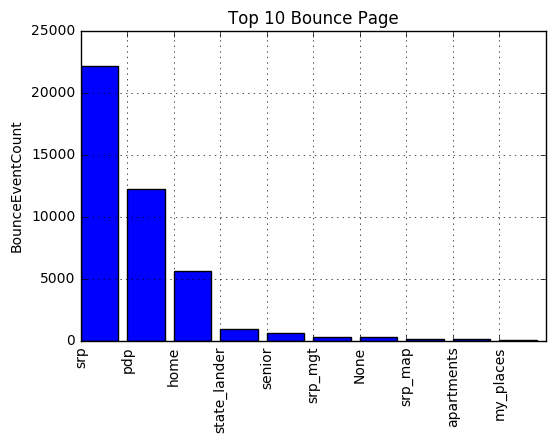

In [2]:
#########################################
#  Bounce By Page
#########################################
sql= """
select 
page
, BounceEventCnt=count(1)
from datascience.dbo.parsedPivot
where ymdid=20161011
and profilekey=1
and firsteventtvisit=1
and lasteventtvisit=1
group by page
order by count(1) desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
BouncePage = pd.read_sql(sql, cnn)
cnn.close()


bar_x=BouncePage['page'].head(10)
bar_y=BouncePage['BounceEventCnt'].head(10)


plt.title('Top 10 Bounce Page')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(10),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

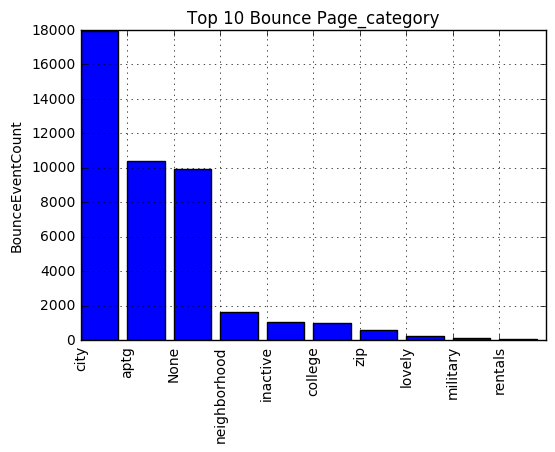

In [3]:
#########################################
#  Bounce By Page_category
#########################################
sql= """
select 
page_category
, BounceEventCnt=count(1)
from datascience.dbo.parsedPivot
where ymdid=20161011
and profilekey=1
and firsteventtvisit=1
and lasteventtvisit=1
group by page_category
order by count(1) desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
BouncePage = pd.read_sql(sql, cnn)
cnn.close()


bar_x=BouncePage['page_category'].head(10)
bar_y=BouncePage['BounceEventCnt'].head(10)


plt.title('Top 10 Bounce Page_category')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(10),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

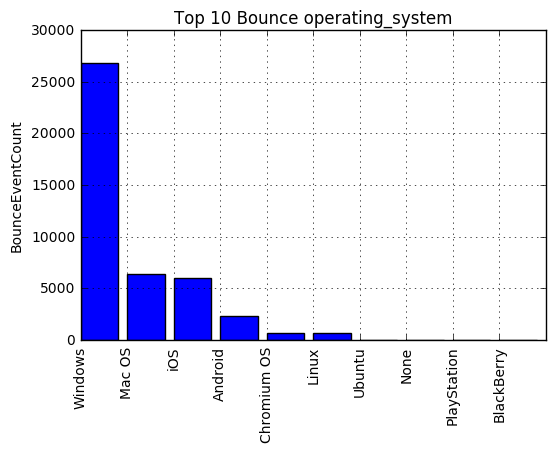

In [4]:
#########################################
#  Bounce By opearating_system
#########################################
sql= """
select 
operating_system
, BounceEventCnt=count(1)
from datascience.dbo.parsedPivot
where ymdid=20161011
and profilekey=1
and firsteventtvisit=1
and lasteventtvisit=1
group by operating_system
order by count(1) desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
Bounce = pd.read_sql(sql, cnn)
cnn.close()


bar_x=Bounce['operating_system'].head(10)
bar_y=Bounce['BounceEventCnt'].head(10)


plt.title('Top 10 Bounce operating_system')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(10),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

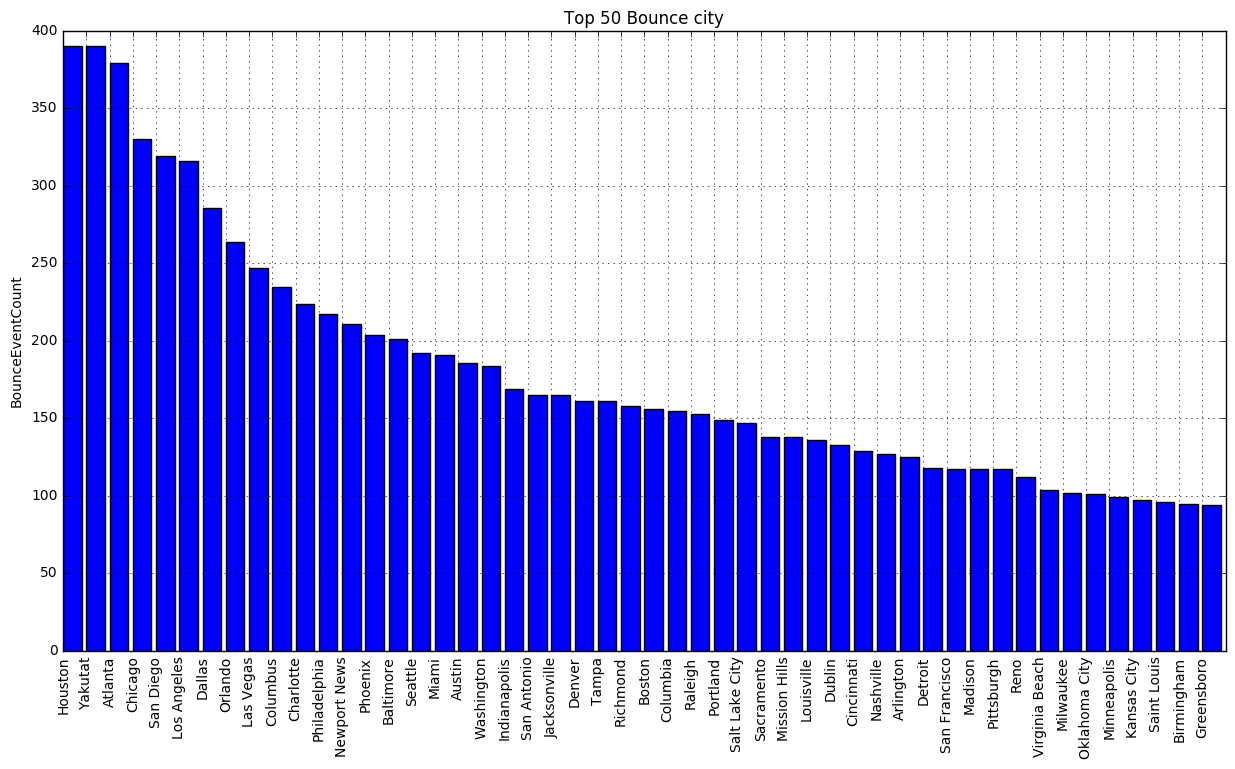

In [5]:
sql= """
select 
city
, BounceEventCnt=count(1)
from datascience.dbo.parsedPivot
where ymdid=20161011
and profilekey=1
and firsteventtvisit=1
and lasteventtvisit=1
and city is not null
group by city
order by count(1) desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
Bounce = pd.read_sql(sql, cnn)
cnn.close()


bar_x=Bounce['city'].head(50)
bar_y=Bounce['BounceEventCnt'].head(50)

plt.figure(figsize=(15,8))
plt.title('Top 50 Bounce city')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(50),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

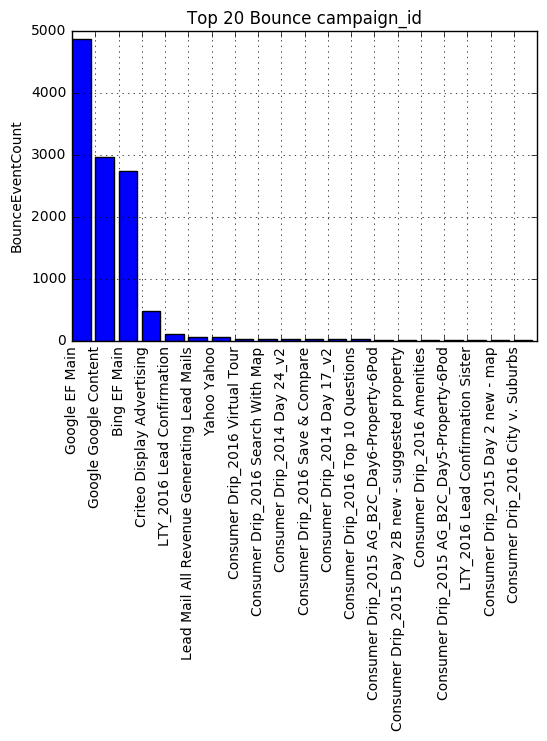

In [7]:
#########################################
#  AG Bounce By campaign_id
#########################################
sql= """
select campaign_id= b.DemandChannel+' '+b.MarketingProgram
       ,a.BounceEventCnt
from 
(select 
campaign_id
, BounceEventCnt=count(1)
from stagedb.dbo.parsedPivot
where  profilekey=1
and firsteventtvisit=1
and lasteventtvisit=1
and campaign_id is not null
group by Campaign_id
) a
join dimensionalmodelweb.conformed.campaign b
on a.campaign_id=b.campaignBusinesskey
order by a.BounceEventCnt desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
Bounce = pd.read_sql(sql, cnn)
cnn.close()


bar_x=Bounce['campaign_id'].head(20)
bar_y=Bounce['BounceEventCnt'].head(20)


plt.title('Top 20 Bounce campaign_id')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(20),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

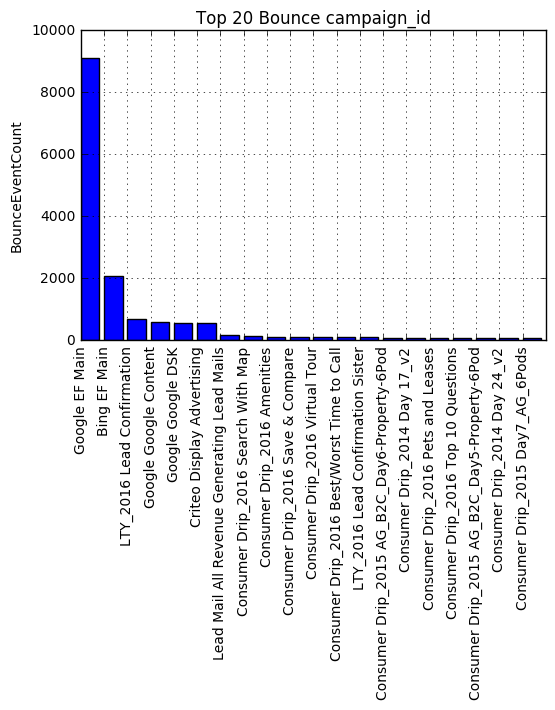

Loading BokehJS ...

TypeError: '_list_attr_splat' object is not callable

In [21]:
##Whic campaing in MdotAG has the highest bounce count
import numpy as np
import pandas as pd
import pyodbc as db
#import pandasql as psql
import matplotlib.pyplot as plt

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

sql= """
select campaign_id= b.DemandChannel+' '+b.MarketingProgram
       ,a.BounceEventCnt
from 
(select 
campaign_id
, BounceEventCnt=count(1)
from stagedb.dbo.parsedPivot
where  profilekey=2
and firsteventtvisit=1
and lasteventtvisit=1
and campaign_id is not null
group by Campaign_id
) a
join dimensionalmodelweb.conformed.campaign b
on a.campaign_id=b.campaignBusinesskey
order by a.BounceEventCnt desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
Bounce = pd.read_sql(sql, cnn)
cnn.close()


bar_x=Bounce['campaign_id'].head(20)
bar_y=Bounce['BounceEventCnt'].head(20)


plt.title('Top 20 Bounce campaign_id')      
plt.bar(bar_x.index,bar_y)
plt.grid(True)
plt.xticks(range(20),bar_x,rotation=90)
plt.ylabel('BounceEventCount')
plt.show()

from bokeh.charts import Bar, show
from bokeh.io import output_notebook
from bokeh.charts.attributes import cat

output_notebook()

p = Bar(Bounce.head(20),
        label=cat(columns='campaign_id', sort=False),
        values='BounceEventCnt',
        title='ListingID 87068 Visit by Campaign',
        color='grey',
        width = 800,
        height = 600)
p.legend().orientation = "top_right"
show(p)

In [1]:
#########################################
#  Bounce By listingid
#########################################
import numpy as np
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

sql= """
select top 20
listingid
,BounceEventCnt=count(1)
from datascience.dbo.parsedPivot
where  profilekey in (1,2,3)
and firsteventtvisit=1
and lasteventtvisit=1
and  listingid is not null
group by listingid
order by count(1) desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
Bounce = pd.read_sql(sql, cnn)
cnn.close()


bar_x=Bounce['listingid'].head(20)
bar_y=Bounce['BounceEventCnt'].head(20)

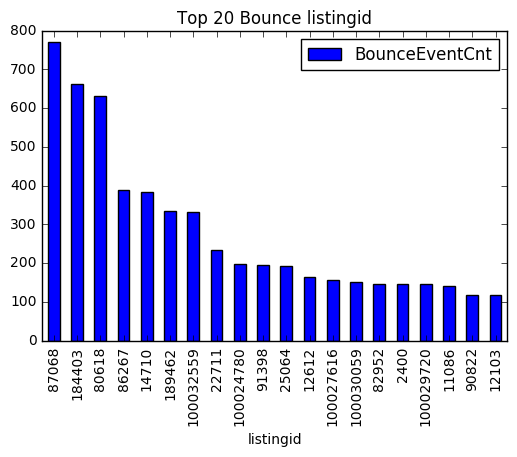

In [2]:
#plt.title('Top 20 Bounce listingid')      
#plt.bar(bar_x.index,bar_y)
#plt.grid(True)
#plt.xticks(range(20),bar_x,rotation=90)
#plt.ylabel('BounceEventCount')
#plt.show()

%matplotlib inline
Bounce.plot(kind='bar',x=Bounce['listingid'],title='Top 20 Bounce listingid')

In [40]:
#Why is listingID 87068 has such a high bounce frequence?  Research traffic pattern for Listingid 87068

#http://image.apartmentguide.com/imgr/e83d16fe8d1913e09ba3e50fd20ba416/850-

#771 visits bounce
#Bounce rate 0.24

Bounce

,campaign_id,visitcount
0,Criteo Display Advertising,3094
1,None,98
2,Google EF Main,3
3,Google Google Content,2


In [45]:
#########################################
#  Research 87068 Traffic Pattern
#########################################
import matplotlib.pyplot as plt

sql= """
select campaign_id= b.DemandChannel+' '+b.MarketingProgram
       ,a.visitcount
from 
(select 
campaign_id
,VisitCount=count(distinct t_visit)
from datascience.dbo.parsedPivot
where  profilekey in (1,2,3)
and listingid='87068'
group by campaign_id
) a
Left join dimensionalmodelweb.conformed.campaign b
on a.campaign_id=b.campaignBusinesskey
order by visitCount desc
"""


cnn = db.connect('DSN=APS;DATABASE=sandbox;UID=reader;PWD=reader')
Bounce = pd.read_sql(sql, cnn)
cnn.close()


bar_x=Bounce['campaign_id'].head(10)
bar_y=Bounce['visitcount'].head(10)


#plt.title('ListingID 87068 Visit by Campaign')      
#plt.bar(bar_x.index,bar_y)
#plt.grid(True)
#plt.xticks(range(10),bar_x,rotation=90)
#plt.ylabel('VisitCount')
#plt.show()

from bokeh.charts import Bar, show
from bokeh.io import output_notebook
from bokeh.charts.attributes import cat

output_notebook()
p = Bar(Bounce,
        label=cat(columns='campaign_id', sort=False),
        values='visitcount',
        title='ListingID 87068 Visit by Campaign')
show(p)

print ('Bounce rate : ' + str(771./(3094+98+3+2)))

Loading BokehJS ...

Bounce rate : 0.2411635908664373


In [ ]:
from bokeh.charts import Histogram
from bokeh.sampledata.autompg import autompg as df
from bokeh.charts import defaults, vplot, hplot, show, output_file

defaults.width = 450
defaults.height = 350

# input options
hist = Histogram(df['mpg'], title="df['mpg']")
hist2 = Histogram(df, 'displ', title="df, 'displ'")
hist3 = Histogram(df, values='hp', title="df, values='hp'")

hist4 = Histogram(df, values='hp', color='cyl',
                  title="df, values='hp', color='cyl'", legend='top_right')

hist5 = Histogram(df, values='mpg', bins=50,
                  title="df, values='mpg', bins=50")

output_file("histograms.html")

show(
    vplot(
        hplot(hist, hist2, hist3),
        hplot(hist4, hist5)
    )
)

In [ ]:
from bokeh.io import output_notebook

#from bokeh.charts import Histogram, output_file, show
#from bokeh.sampledata.autompg import autompg as df

output_notebook()
#show(
#    vplot(
#        hplot(hist, hist2, hist3)
#    )
#)
show(hist)



In [1]:
import numpy as np
import pandas as pd
import pyodbc as db
#import pandasql as psql
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [5]:
sql="""
select 
p.parseid, p.profilekey,  p.ymdid
--,t.t_visit, t.rownum
,p.t_visit
,t.rownum
,isLead=case when action='lead_submission'
          then 1 else 0 end 
,Eventdate
,EventHour=datepart(hh,eventDate)
, action,selection,value, page, page_sub, page_category, [position]=left([position],200), seq
,browser, browser_version, campaign_id
,iscampaign=case when campaign_id is not null and ef_id is not null then 1 else 0 end
, city,state, zip_code
, CustIPAddress, ef_id --,event_name
, [featured_array]=left([featured_array],500) 
--,FirstEventTVisit,LastEventTVisit
, [listing_array]=left([listing_array],500) , listingid, listings_per_page--, military
, neighborhood --, node_class, node_g_parent_class, node_g_parent_name, node_great_g_parent_class, node_href, node_name, node_parent_class, node_value
, operating_system, operating_system_version, page_number
, [path]=left([path],500)  
,  profile, [querystring]=left([querystring],500) ,[referrer]=left([referrer],500) ,  [referring_domain]=left([referring_domain],200) 
, [refinement_array]=left([refinement_array],500) 
, refineFl=case when refinement_array  is not null then 1 else 0 end
, screen_resolution, screen_type --,ServerIPAddress
, [spotlight_array]=left([spotlight_array],500)  
, ssSiteName, ssTestName, ssVariationGroupName, subprofile --,title
, tpl_source, unitlayout_id, url
--, utm_campaign, utm_medium
, uzid --, value--, visit, visitor --, [WT.mc_id], [wt.srch]
--, x, y
--from [dbo].[ParsedPivot]  p
from datascience.dbo.parsedpivot p
join [tvisit_eventdate_rownum] t
on p.parseid=t.parseid
where p.profilekey=2
  and p.ymdid=20161011
  and datepart(hh,eventDate) in (11,12,13)
"""

cnn = db.connect('DSN=APS;DATABASE=datascience;UID=reader;PWD=reader')
mdotPP = pd.read_sql(sql, cnn)
cnn.close()


In [ ]:
mdotPP['refinement_dict']=pd.Series(data=None, index=mdotPP.index)

#del mdotPP['refinement_dict']


#for i in mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_array'].index:
#    test=mdotPP.loc[i]['refinement_array'].split(',')
#    #print( test   )
#    d=dict()           
#    for idx, val in enumerate(test):
#        a=test[idx].split(' ')    
#        if a[0].isnumeric():
#            #print(a[1],a[0])
#            d[a[1]]=a[0]
#            #print(d)
#        else:
#            try:
#                d[a[0]] =a[1]
#            except:
#                d['Value'] =a[0]
#            #print(d)
#    print(d, i)
#    #mdotPP.loc[i,'refinement_dict'] =  d
#    mdotPP.set_value(i,'refinement_dict',d)


#    mdotPP.loc[1]['refinement_array'] == None
    
for i in mdotPP['refinement_array'].index:
    #test=mdotPP.loc[i]['refinement_array'].split(',')
    d=dict()
    if mdotPP.loc[i]['refinement_array'] == None:
        d['NullValue'] =True
    else:
        test=mdotPP.loc[i]['refinement_array'].split(',')
    #print( test   )
        for idx, val in enumerate(test):
            a=test[idx].split(' ')    
            if a[0].isnumeric():
                #print(a[1],a[0])
                d[a[1]]=a[0]
                #print(d)
            else:
                try:
                    d[a[0]] =a[1]
                except:
                    d['Value'] =a[0]
            #print(d)
        print(d, i)
    mdotPP.set_value(i,'refinement_dict',d)

    


In [12]:
#mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_dict']
mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_dict'].apply(lambda x: x.get('Max'))
#mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_dict'].apply(lambda x: x.get('Min'))
#mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_dict'].apply(lambda x: x.get('Bedrooms'))
#mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_dict'].apply(lambda x: x.get('Baths'))
#mdotPP.loc[mdotPP['refinement_array'].notnull()]['refinement_dict'].apply(lambda x: x.get('miles'))

#mdotPP['refinement_dict'].apply(lambda x: x.get('miles'))  


12         $900
161        None
208       $1100
508        None
554        $400
578        None
626        None
871        None
1061       None
1136       $400
1188       None
1191       None
1212       None
1223       None
1261       $700
1267       $600
1304       None
1329       $400
1359       $700
1367       $400
1514       None
1583       None
1640       None
1674       $700
1698       $700
1745       $400
1746       $900
1789       None
1817       $600
1837       $400
          ...  
269628     None
269656     $700
269684     $700
269689    $1000
269700     $700
269717     None
269880     $400
269928    $1000
269966     None
270015     $500
270105     $800
270139     $600
270225    $2200
270266     None
270280     None
270370     $500
270474     None
270475     $800
270629     $600
270634     $600
270688     $500
270724     None
270743     None
270796    $1100
270800     None
270813     $400
270829     $500
270833     $600
270887     $900
270912     $800
Name: refinement_dict, d

In [29]:
%%HTML
<script type='text/javascript' src='https://viz.rentpath.com/javascripts/api/viz_v1.js'></script>
<div class='tableauPlaceholder' style='width: 1104px; height: 1262px;'>
<object class='tableauViz' width='1104' height='1262' style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fviz.rentpath.com%2F' /> 
<param name='site_root' value='' />
<param name='name' value='DynamicLeadFormPerformanceAnalysis&#47;DLF_Story' /><param name='tabs' value='yes' />
<param name='toolbar' value='yes' />
<param name='showShareOptions' value='true' />
</object></div>